## Part II - Artificial Intelligence Basics: Clustering

> **Learning outcomes:**
> 
> - Understand the difference between supervised and unsupervised algorithms.
> - Learn and apply the K-means algorithm for clustering tasks using sklearn.
> - Learn the Elbow method to select a suitable number of clusters.


### What is Clustering?
Clustering is the task of dividing the population or data points into a number of groups, such that data points in the same groups are more similar to other data points within the group, and dissimilar to the data points in other groups. Clustering is a form of unsupervised algorithm. This means that unlike classification or regression, clustering does not require ground truth labelled data. Such algorithms are capable of finding groups that are not explicity labelled and identify underlying patterns that might appear in the dataset. One of the simplest, yet effective clustering algorithm is the K-means algorithm.

![Kmeans](clustering/image1.png)

### K-means
K means is used for a variety of cases, such as:
- Customer Profiling
- Market segmentation
- Computer vision
- Geo-statistics
- Astronomy


The K-means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. The K-means algorithm aims to choose centroid that minimise the inertia, or within-cluster sum-of-squares criterion:
![Kmeans](clustering/eq.png)

The steps for the K-means algorithm is as follows:
1. Ask user how many clusters they’d like. (e.g. k=5) 
2. Randomly guess k cluster Center locations
3. Each datapoint identifies which Center it’s closest to according to the sum-of-squares criterion. (Thus each Center “owns” a set of datapoints)
4. Reposition the k cluster Center locations by minimizing the sum-of-squares criterion. This can be achieved by setting the new locations as the average of all the points in a cluster.
5. Repeat steps 3 and 4 until no new datapoints are added or removed from all clusters, or the predefined maximum number of iterations have been reached.

![Kmeans](clustering/image2.png)

### The Elbow Method

As you can see in the first step of the K-means algorithm, the user has to specify the number of clusters to be used for the algorithm. We can do this by attempting the K-means for various values of K and visually selecting the K-value using the elbow method. We would like a small sum-of-squares error, however, the sum-of-squares error tends to decrease toward 0 as we increase the value of k. Sum-of-squares of will decrease towards 0 with increasing k, because when k is equal to the number of data points, each data point is its own cluster, and there will be no error between it and the center of its cluster.

![Kmeans](clustering/image3.png)

The following code example shows the K-means algorithm and the elbow visualization using the Iris dataset which can be obtained from:  
https://www.kaggle.com/uciml/iris


     SepalLength  SepalWidth  PetalLength  PetalWidth            Iris
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]
     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0

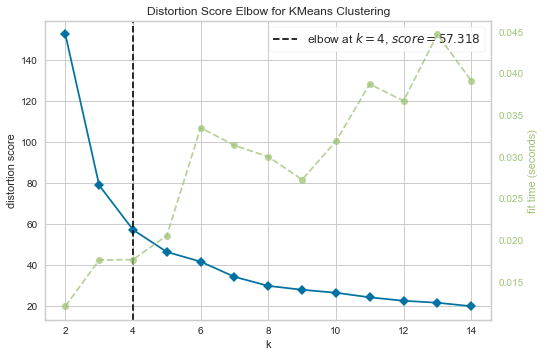

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("iris.csv")
print(df)
df["Species"].unique()
df = df.replace("Iris-setosa", 0)
df=df.replace("Iris-versicolor", 1)
df = df.replace("Iris-virginica", 2)

X=df.loc[:, ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
Y=df['Species']
print(X)
print(Y)

from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state=2021)
model.fit(X,Y)
pred=model.predict(X)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred, Y)
print(cm)

accuracy=(cm[0,0]+cm[1,1]+cm[2,2])/sum(sum(cm)) #cm[rows, columns]
print(accuracy)

from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X)
visualizer.show()   

